# Problem
Let $\mathbb A$ the space of addresses<br>
Suppose we have a set of addresses $\mathbb V^1 \subset \mathbb A$ a and a set of addresses 
$\mathbb V^2  \subset \mathbb A $ and the following condition holds
    $$\mathbb V^1  \cap  \mathbb   V^2 \neq \emptyset$$
Suppose that we have a possibly non surjective but injective mapping $\phi : \mathbb V^1 \rightarrow \mathbb V^2 $ 
which associate some variables in $\mathbb V^1$ with one and only one variable in $\mathbb V^2$, which is the address that shall contain the initial value of the address that maps to it in the domain

Let us define $\text{MemoryTransferMachine}$ as a collection of tuplas $\{v_i,c_i\}_i$ where $v$ is an address and $c$ is the number of available copies

We want to build an efficient way to perform the transfer of data, such that minimizes the number of required temporary copies

# Worst case scenario

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [86]:
N   = 25
V_1 = np.arange((N))
V_2 = np.arange((N)) + 2
mapping = np.c_[V_1, V_2[np.random.choice(len(V_1),len(V_1),False)]]
while np.any(mapping[:,0] == mapping[:,1]):
    mapping = np.c_[V_1, V_2[np.random.choice(len(V_1),len(V_1),False)]]
for m in mapping:
    print("%d => %d" % (m[0],m[1]))

0 => 9
1 => 11
2 => 7
3 => 4
4 => 5
5 => 17
6 => 3
7 => 19
8 => 10
9 => 8
10 => 6
11 => 14
12 => 25
13 => 23
14 => 21
15 => 24
16 => 20
17 => 12
18 => 16
19 => 13
20 => 15
21 => 26
22 => 2
23 => 22
24 => 18


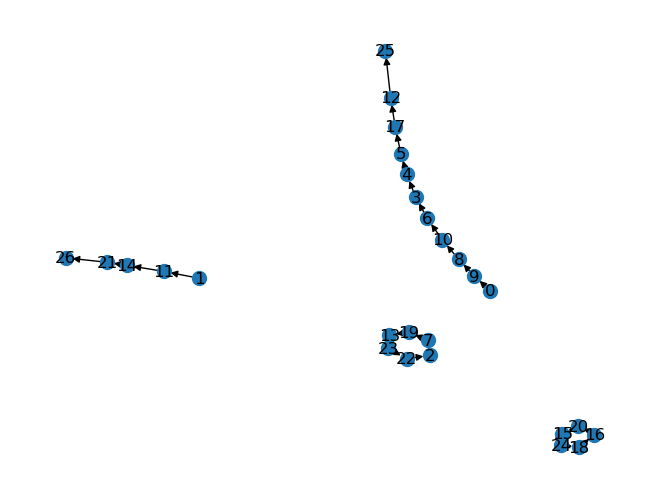

In [87]:
G       = nx.DiGraph()
for m in mapping:
    G.add_edge(m[0],m[1])

pos = nx.spring_layout(G, k=0.15, iterations=100)
nx.draw(G, pos = pos, with_labels = True, node_size = 100)

# The algorithm

$
\text{Loops}    \leftarrow \text{set of loops induced by $\phi$} \\
\text{Threads}  \leftarrow \text{set of threads induced by $\phi$} \\
\text{/*transform loops in threads*/}\\
\text{${\bf for}$ loop $\in$ Loops}:
\\\hspace {2em} \text{cut} \leftarrow \text{cheapest variable to copy}
\\\hspace {2em} \text{cut.createCopy()}\\
\\\hspace {2em} \text{cut.input.output = cut.copy()}
\\\hspace {2em} \text{cut.output.input = cut}
\\\hspace {2em} \text{Threads.insert(loop)}
\\\text{${\bf for}$ thread $\in$ Threads}:
\\\hspace {2em} \text{tail} \leftarrow \text{follow the arrows until end and return the last variable in the thread}
\\\hspace {2em} \text{$\bf repeat$ until last one }
\\\hspace {4em} \text{codePrint( $\bf move$ (tail.input $\leftarrow$ tail))} \text{ // move the memory }
\\\hspace {4em} \text{tail $\leftarrow$ tail.input}
$

In [15]:
import networkx as nx
G = nx.Graph()
G.add_node("pippo")
G.nodes["pippo"]['in'] = 'pippo'
G.nodes["pippo"].get("out") == None
G.nodes["pippo"] == G.nodes["pippo"]

True

In [14]:
a = set([1,2,3])
a.remove(2)
a

{1, 3}

<BarContainer object of 20 artists>

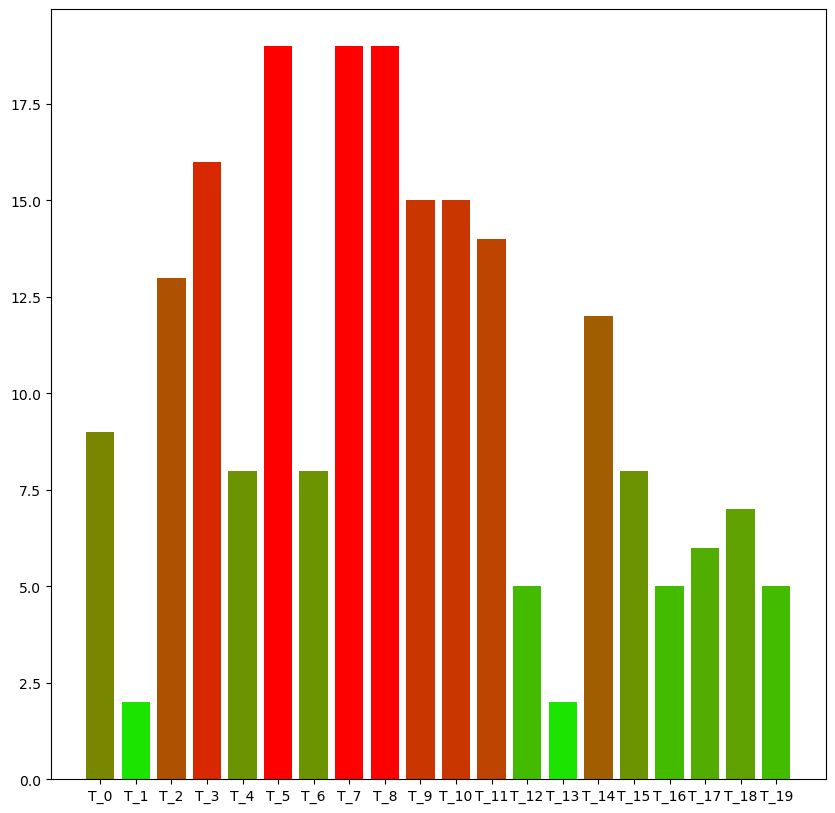

In [35]:
import matplotlib.pyplot as plt
import numpy as np

n = 20
x = np.arange(n) 
y = np.random.choice(n, size = n, replace = True) + 1
plt.figure(figsize = (10,10))
plt.xticks(x,[ "T_"+str(x) for x in x])
plt.bar(x,y, color = np.c_[y/y.max() , 1- y/y.max(), 0 * y])